## Preprocessing - Disparate Impact Remover -  Compas Model
- for 'sex' and 'race'

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.insert(0, project_root)

import matplotlib.pyplot as plt

import pandas as pd
from src.data_loading import load_compas_race, load_compas_sex
from src.metrics import compute_metrics, compare_viz_metrics_2x3, save_agg_metrics, save_raw_metrics
from src.modeling import disparate_impact_remover_train_and_predict
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

/opt/anaconda3/lib/python3.11/site-packages/inFairness/utils/ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
/opt/anaconda3/lib/python3.11/site-packages/inFairness/utils/ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  monte_carlo_vect_ndcg = vmap(vect_normalized_di

In [2]:
dataset_name = 'compas'
mitigation_name   = 'disparate_impact'
pipeline_stage    = 'preprocessing'   

In [3]:
baseline_race_agg = pd.read_csv('../../reports/baseline_agg/compas_race_metrics_agg.csv', index_col=0)
baseline_sex_agg = pd.read_csv('../../reports/baseline_agg/compas_sex_metrics_agg.csv', index_col=0)

----------------------------------------------------------------------------------------------------

## default disparate impact remover, sex

In [4]:
# 1) Load COMPAS data
protected = 'sex'
privileged_value   = 0.0
unprivileged_value = 1.0

ds, df = load_compas_sex()   
feature_cols = [c for c in df.columns if c not in ('label', protected)]

# 2) Run Experiment and Evaluate
sss = StratifiedShuffleSplit(n_splits=25, test_size=0.2, random_state=42)
results = []

for train_idx, test_idx in sss.split(df, df['label']):
    test_df, y_t, y_pred = disparate_impact_remover_train_and_predict(
        ds=ds,
        df=df,
        train_idx=train_idx,
        test_idx=test_idx,
        protected=protected,
        repair_level=1.0,          
        pipeline=None             
)    
    m = compute_metrics(
        test_df, y_t, y_pred,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)

# 3) Aggregate 
compas_sex_metrics     = pd.DataFrame(results)
compas_sex_metrics_agg = compas_sex_metrics.agg(['mean', 'std'])
print(compas_sex_metrics_agg)

      accuracy  f1_score       SPD        DI       EOD       AOD
mean  0.668053  0.576063 -0.207267  0.449377 -0.217048 -0.180553
std   0.011605  0.027333  0.038968  0.062542  0.060983  0.040791


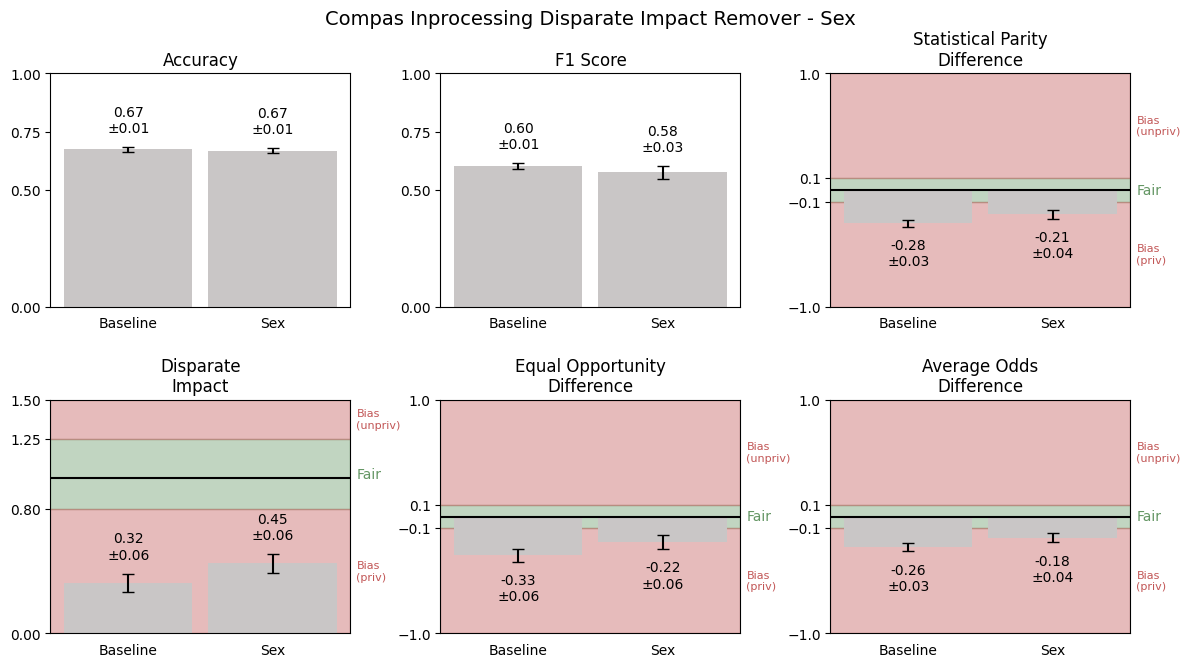

In [5]:
%matplotlib inline
compare_viz_metrics_2x3(baseline_sex_agg, compas_sex_metrics_agg, 'Baseline', 'Sex', 'Compas Inprocessing Disparate Impact Remover - Sex')

## default disparate impact remover, race

In [6]:
# 1) Load COMPAS data
protected = 'race'
privileged_value   = 0.0
unprivileged_value = 1.0

ds, df = load_compas_race()   
feature_cols = [c for c in df.columns if c not in ('label', protected)]

# 2) Run Experiment and Evaluate
sss = StratifiedShuffleSplit(n_splits=25, test_size=0.2, random_state=42)
results = []

for train_idx, test_idx in sss.split(df, df['label']):
    test_df, y_t, y_pred = disparate_impact_remover_train_and_predict(
        ds=ds,
        df=df,
        train_idx=train_idx,
        test_idx=test_idx,
        protected=protected,
        repair_level=1.0,          
        pipeline=None             
)    
    m = compute_metrics(
        test_df, y_t, y_pred,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)

# 3) Aggregate 
compas_race_metrics     = pd.DataFrame(results)
compas_race_metrics_agg = compas_race_metrics.agg(['mean', 'std'])
print(compas_race_metrics_agg)

      accuracy  f1_score       SPD        DI       EOD       AOD
mean  0.668718  0.572006 -0.125212  0.662996 -0.137270 -0.103879
std   0.010765  0.021280  0.034145  0.071190  0.048258  0.035474


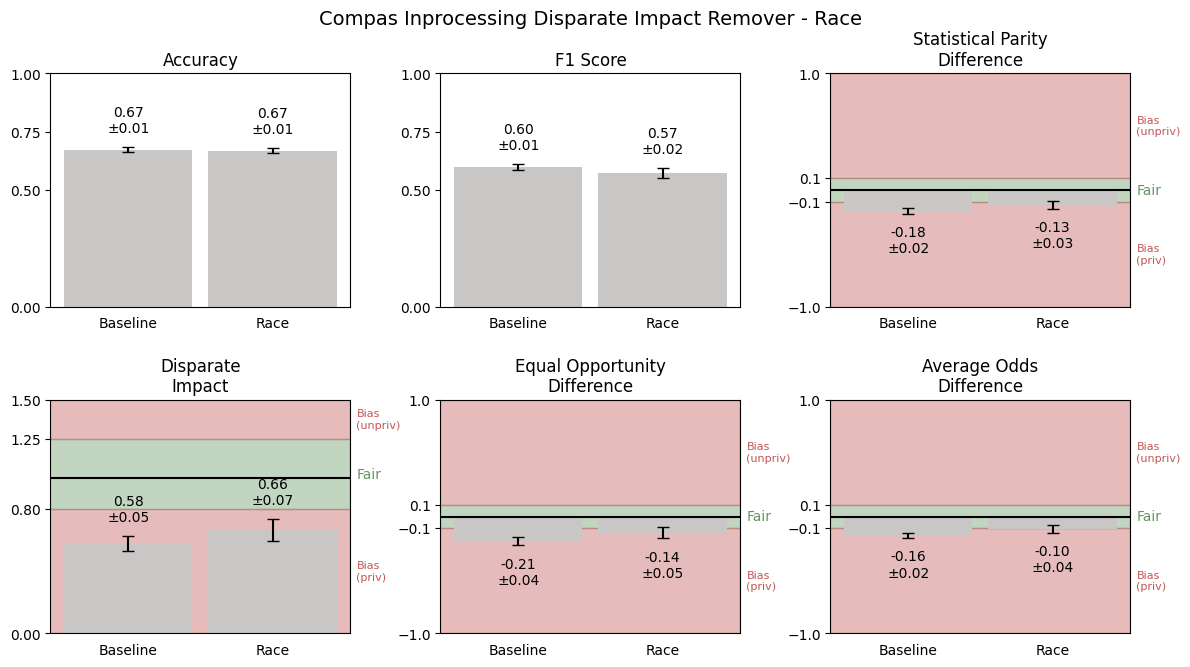

In [7]:
%matplotlib inline
compare_viz_metrics_2x3(baseline_race_agg, compas_race_metrics_agg, 'Baseline', 'Race', 'Compas Inprocessing Disparate Impact Remover - Race')

----------------------------------

In [8]:
# 1) Save the aggregated metrics 
save_agg_metrics(
    dataset_name      = dataset_name,
    mitigation_name   = mitigation_name,
    race_agg_df       = compas_race_metrics_agg,
    sex_agg_df        = compas_sex_metrics_agg,
    pipeline_stage    = pipeline_stage   
)

# 2) Save the raw metrics
save_raw_metrics(
    dataset_name      = dataset_name,
    mitigation_name   = mitigation_name,
    race_raw_df       = compas_race_metrics_agg,
    sex_raw_df        = compas_sex_metrics,
    pipeline_stage    = pipeline_stage
)
